## Building ARIMAX model

In [1]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as sm
import statsmodels.tsa.arima_model as ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
from pandas import tseries
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [17]:
# Import/clean dataframes

X_train = pd.read_csv('/Users/gabeheim/documents/repos/bender/source files/X_train.csv')#, index_col='time')
X_test = pd.read_csv('/Users/gabeheim/documents/repos/bender/source files/X_test.csv')#, index_col='time')
Y_train = pd.read_csv('/Users/gabeheim/documents/repos/bender/source files/Y_train.csv')#, index_col='time')
Y_test = pd.read_csv('/Users/gabeheim/documents/repos/bender/source files/Y_test.csv')#, index_col='time')
X = pd.concat([X_train, X_test])
Y = pd.concat([Y_train, Y_test])

X_train.index = pd.to_datetime(X_train.index)
X_test.index = pd.to_datetime(X_test.index)
Y_train.index = pd.to_datetime(Y_train.index)
Y_test.index = pd.to_datetime(Y_test.index)
Y_train

,time,XEM
1970-01-01 00:00:00.000000000,8/29/17 11:00,0.008144
1970-01-01 00:00:00.000000001,8/29/17 12:00,-0.029860
1970-01-01 00:00:00.000000002,8/29/17 13:00,-0.021717
1970-01-01 00:00:00.000000003,8/29/17 14:00,0.008144
1970-01-01 00:00:00.000000004,8/29/17 15:00,-0.108583
1970-01-01 00:00:00.000000005,8/29/17 16:00,-0.100439
1970-01-01 00:00:00.000000006,8/29/17 17:00,-0.100439
1970-01-01 00:00:00.000000007,8/29/17 18:00,-0.038004
1970-01-01 00:00:00.000000008,8/29/17 19:00,0.084152
1970-01-01 00:00:00.000000009,8/29/17 20:00,0.086866


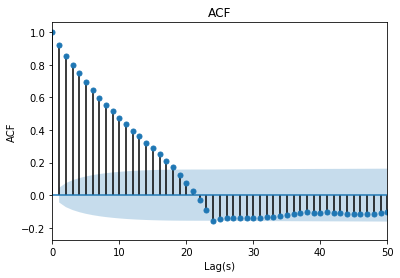

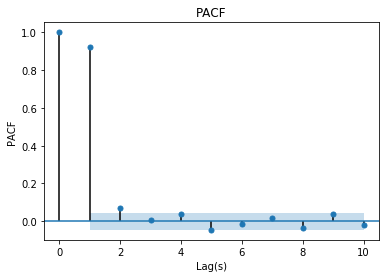

In [13]:
# Plotting ACF and PACF

# ACF
plot_acf(Y['XEM'])
plt.title('ACF', loc='center')
plt.xlim((0, 50))
plt.ylabel('ACF')
plt.xlabel('Lag(s)')
plt.show()

# PACF
plot_pacf(Y['XEM'], lags=10)
plt.title('PACF', loc='center')
plt.ylabel('PACF')
plt.xlabel('Lag(s)')
plt.show()

In [28]:
# ARIMAX

# Building AR 2 with exogeneous variables
print(X_train['IOT',  'gg_crypto',  'gg_nem_w'])
arima_d = ARIMA.ARIMA(endog=Y_train['XEM'], exog=X_train.values.astype(float), order=[1,0,0])
arima_results_d = arima_d.fit()
print(arima_results_d.summary())

# Plotting the fitted values
plt.plot(np.arange(len(Y_train)), Y_train, color='purple', label='Actual')
plt.plot(np.arange(len(arima_results_d.fittedvalues)), arima_results_d.fittedvalues, color='green', label='Fitted Value')
plt.xlim((0, 400))
plt.title('ARIMAX Fitted Values')
plt.xlabel('Time')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()

# Out-of-sample prediction
exog_d = X_test
arima_results_ofs_d = arima_results_d.predict(exog=exog_d, start=exog_d.index[0], end=exog_d.index[-1])
plt.plot(np.arange(len(Y_test)), Y_test, color='purple', label='Actual')
plt.plot(np.arange(len(arima_results_ofs_d)), arima_results_ofs_d, color='green', label='Prediction')
#plt.xlim((0, 50))
plt.title('ARIMAX Out-of-Sample Prediction')
plt.xlabel('Time')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()

KeyError: ('IOT', 'gg_crypto', 'gg_nem_w')

In [5]:
# Metric

# Calculating mean squared error for steps 1-100
expected = Y_test[:99]
predictions = arima_results_ofs_d[:99]
mse = mean_squared_error(expected, predictions)
print('Mean Squared Error')
print('Steps 1-100: %f' % mse)

# Calculating mean squred error for steps 101-600
expected = Y_test[100:]
predictions = arima_results_ofs_d[100:]
mse = mean_squared_error(expected, predictions)
print('Steps 101-600: %f' % mse)


Mean Squared Error
Steps 1-100: 0.039251
Steps 101-600: 0.118532


### Conclusions: 
Using AR 1 model with 3 exogeneous variables, the out of sample prediction performed relatively well for steps < 100. Since the error keeps compounding, the model doesn't do so well beyond step 100. MSE for steps 1-100 is 0.039251 while MSE for steps 101-600 is 0.118532. 